In [1]:
#Created: 15Apr2022
#Author: Lynn Menchaca

#Resources:
#Kaggle Competition-> Spaceship Titanic

#Purpose: Clean and Analyze Data File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [3]:
data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Spaceship_Titanic/'
df_train = pd.read_csv(data_file_path+'train.csv')
df_test = pd.read_csv(data_file_path+'test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#Test data frame is missing one column: Transported (the result)
print(df_train.shape)
print(df_test.shape)
df_train.dtypes

(8693, 14)
(4277, 13)


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
#find all the missing values in each column
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#Looking at how many rows have multiple missing data columns
df_train.isnull().sum(axis=1).value_counts()
#df[df.isnull().sum(axis=1)==3]

0    6606
1    1867
2     203
3      17
dtype: int64

In [7]:
#Making sure if the passenger is in suspended animation they don't spend money
df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [8]:
#Fill the null spending values for the passengers in Cryo Sleep with 0
spend = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for x in spend:
    df_train.loc[(df_train[x].isna() & df_train['CryoSleep']==True),x]=0
    df_test.loc[(df_test[x].isna() & df_test['CryoSleep']==True),x]=0

df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

In [9]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name            200
Transported       0
dtype: int64

In [10]:
#Looking for more patters with Cryo Sleep
df_cryo.head(15)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Altardr Flatic,True
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,0.0,0.0,0.0,Mollen Mcfaddennon,False
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,0.0,0.0,0.0,0.0,0.0,Mael Brantuarez,False
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0,0.0,0.0,Penton Fullided,True
36,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True


In [11]:
#Since Transported has no missing values I'm not going to remove any rows at this time

#Removing name column since it is similar to the PassengerID column
#Removing name column because it has missing data
df_train = df_train.drop('Name',axis=1)
df_test = df_test.drop('Name',axis=1)

df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

Percentage of Passengers Transported:
True     0.503624
False    0.496376
Name: Transported, dtype: float64


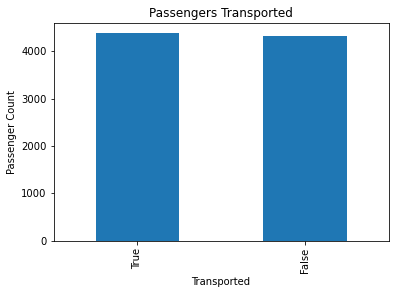

In [12]:
#General Look at Transported vs Stayed
trans_percent = df_train.Transported.value_counts() / len(df_train)
print('Percentage of Passengers Transported:')
print(trans_percent)

df_train.Transported.value_counts().plot(kind='bar')
plt.ylabel('Passenger Count')
plt.xlabel('Transported')
plt.title('Passengers Transported')
plt.show()

In [13]:
#Description and Visual of Ages Transported
print(df_train['Age'].describe())
print('\n')
df_train[df_train['Age']<1].head()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64




,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,False


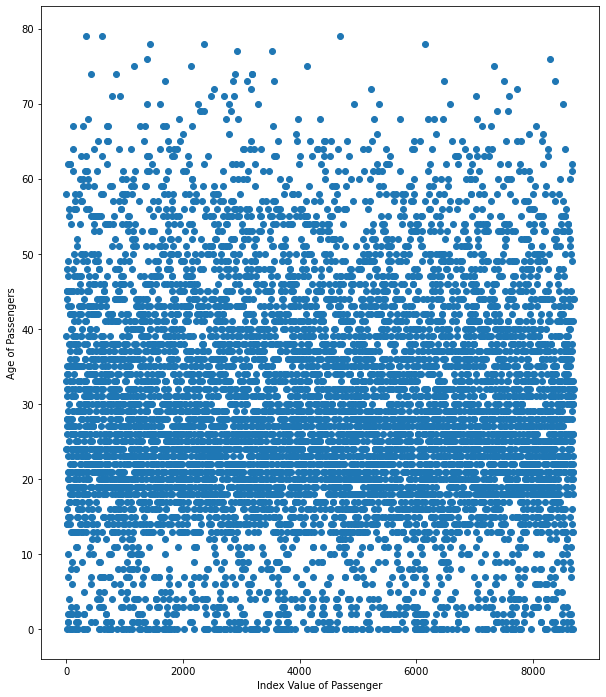

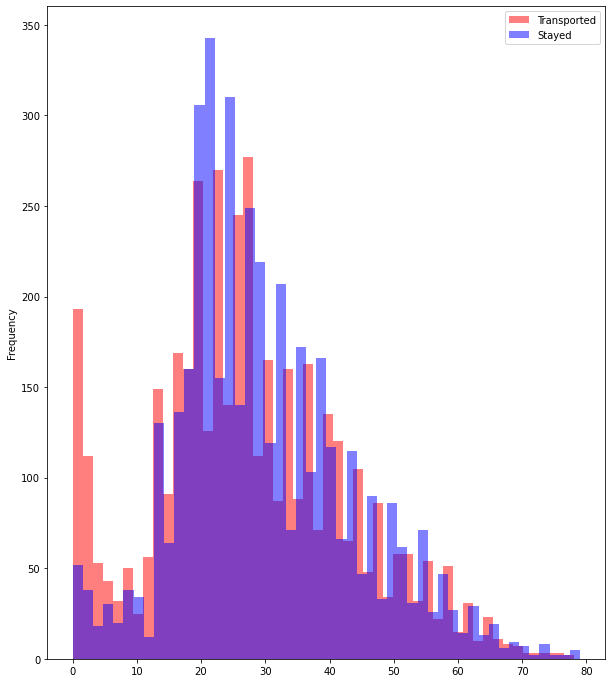

In [14]:
plt.figure(figsize=(10,12))
plt.scatter(list(df_train.index.values), df_train['Age'])
plt.xlabel('Index Value of Passenger')
plt.ylabel('Age of Passengers')
plt.show()

#hist_trans(df_train, 'Age')
plt.figure(figsize=(10,12))
transported = df_train[df_train["Transported"] == True]
stayed = df_train[df_train["Transported"] == False]
transported['Age'].plot.hist(alpha=0.5,color='red',bins=50)
stayed['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Transported','Stayed'])
plt.show()

In [15]:
#Function to put data frame column values in to bins
def process_bins(df,column,cut_points,label_names):
    df[column] = df[column].fillna(-0.5)
    df[column+'_Categories'] = pd.cut(df[column],cut_points,labels=label_names)
    return df


In [16]:
#Putting ages in to bins
#It looks like babies are just listed as age 0
cut_points = [-1, -0.1, 5, 12.9, 17.9, 34.9, 59.9, 100]
label_names = ['Missing', 'Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_train = process_bins(df_train,'Age', cut_points, label_names)
df_test = process_bins(df_test,'Age', cut_points, label_names)

df_train.head(5)
#df_train[df_train['Age']<1].head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Categories
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Young Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Adult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Young Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Teenager


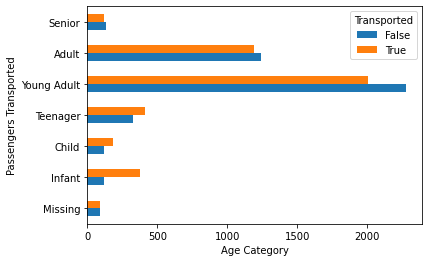

In [17]:
#Ploting Age bins vs Transported

pd.pivot_table(df_train,index = 'Age_Categories', columns = 'Transported',aggfunc ='size').plot.barh()
plt.xlabel('Age Category')
plt.ylabel('Passengers Transported')
plt.show()

In [18]:
#See list of columns again
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_Categories'],
      dtype='object')

In [19]:
#Reviewing all Money Spent columns

#list of all location money is spent on the spaceship
spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

#Description of how much money was spent at each location
for location in spend_locations:
    print(df_train[location].describe())
    print('\n')    

count     8580.000000
mean       222.906876
std        664.368930
min          0.000000
25%          0.000000
50%          0.000000
75%         44.000000
max      14327.000000
Name: RoomService, dtype: float64


count     8580.000000
mean       454.339977
std       1605.430304
min          0.000000
25%          0.000000
50%          0.000000
75%         70.000000
max      29813.000000
Name: FoodCourt, dtype: float64


count     8581.000000
mean       171.785573
std        601.581625
min          0.000000
25%          0.000000
50%          0.000000
75%         24.000000
max      23492.000000
Name: ShoppingMall, dtype: float64


count     8575.000000
mean       308.780292
std       1132.710170
min          0.000000
25%          0.000000
50%          0.000000
75%         58.000000
max      22408.000000
Name: Spa, dtype: float64


count     8567.000000
mean       302.648535
std       1141.855811
min          0.000000
25%          0.000000
50%          0.000000
75%         44.000000
max    

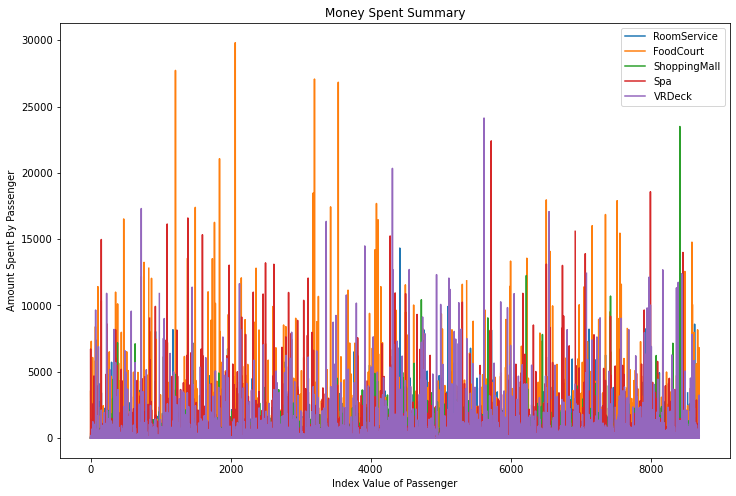

In [20]:
#Plotting raw spending columns
#list of spending locations -> spend_locations

spend_locations = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(12,8))
for location in spend_locations:
    plt.plot(list(df_train.index.values),
             df_train[location],
             label=location)
plt.legend()
plt.title('Money Spent Summary')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Amount Spent By Passenger')
plt.show()

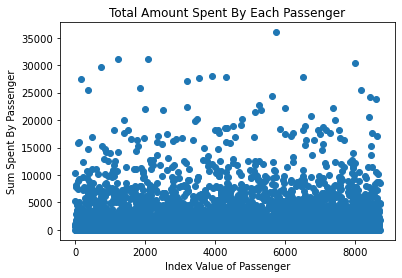

In [21]:
#Total amount each persson spent
#spend_location-> list of location to spend money
df_train['Spend_Sum'] = df_train[spend_locations].sum(axis=1)
df_test['Spend_Sum'] = df_train[spend_locations].sum(axis=1)

plt.scatter(list(df_train.index.values) , df_train['Spend_Sum'])
plt.title('Total Amount Spent By Each Passenger')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Sum Spent By Passenger')
plt.show()

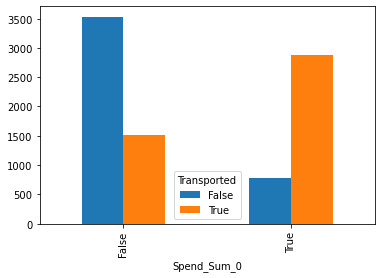

In [22]:
#If they spent money at all vs transported
df_train['Spend_Sum_0'] = df_train.apply(lambda x: 'True' if x['Spend_Sum'] == 0 else False, axis=1)
df_test['Spend_Sum_0'] = df_train.apply(lambda x: 'True' if x['Spend_Sum'] == 0 else False, axis=1)

spend_sum = df_train.groupby(['Spend_Sum_0','Transported']).size().unstack('Transported')
spend_sum.plot(kind='bar')
plt.show()

In [23]:
# Putting money spent in location in to bins
cut_points = [-1, -0.1, 0.1, 500, 5000, 30000]
label_names = ['Missing', '$0', '$0.1_500', '$501_5000', '$5001_30000']

#list of spending locations -> spend_locations
for location in spend_locations:
    df_train = process_bins(df_train, location, cut_points, label_names)
    df_test = process_bins(df_test, location, cut_points, label_names)

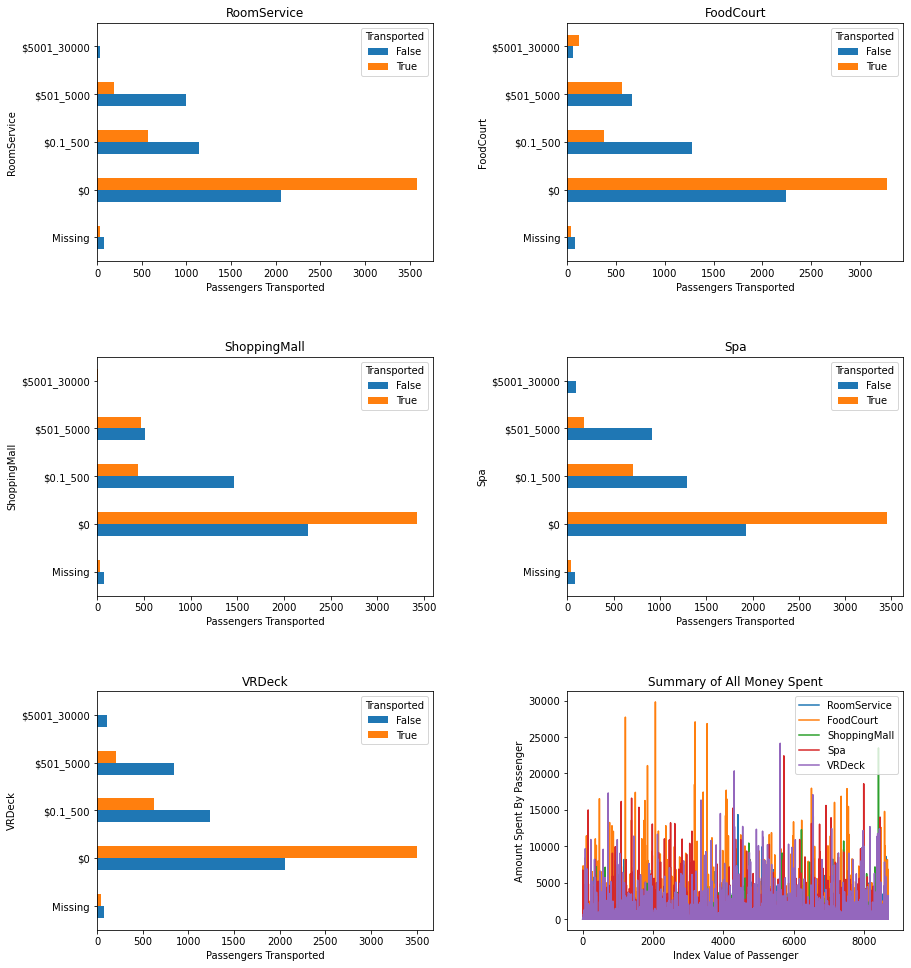

In [24]:
#Plotting the money spent at each location
#list of spending locations -> spend_locations
fig = plt.figure(figsize=(14,18))
for i, location in zip(range(1,6), spend_locations):
    ax_i = plt.subplot(3, 2, i)
    #spend_pivot = df_train.pivot_table(index=location+'_Categories', values='Transported', aggfunc=np.sum)
    spend_pivot = pd.pivot_table(df_train,index = location+'_Categories', columns = 'Transported',aggfunc ='size')
    spend_pivot.plot(kind='barh', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_ylabel(location)
    ax_i.set_xlabel('Passengers Transported')
    ax_i.set_title(location)

plt.subplot(3,2,6)
for location in spend_locations:
    plt.plot(list(df_train.index.values),
             df_train[location],
             label=location)
plt.legend()
plt.title('Summary of All Money Spent')
plt.xlabel('Index Value of Passenger')
plt.ylabel('Amount Spent By Passenger')

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [25]:
#Since $0 leads for all spending locations
#compare $0 to money spent
#list of spending locations -> spend_locations

for location in spend_locations:
    df_train[location+'_0'] = df_train.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)
    df_test[location+'_0'] = df_test.apply(lambda x: 'True' if x[location] == 0 
                                              else ('False' if x[location] > 0 else 'Missing'), axis=1)

df_train['RoomService_0'].value_counts()

True       5645
False      2935
Missing     113
Name: RoomService_0, dtype: int64

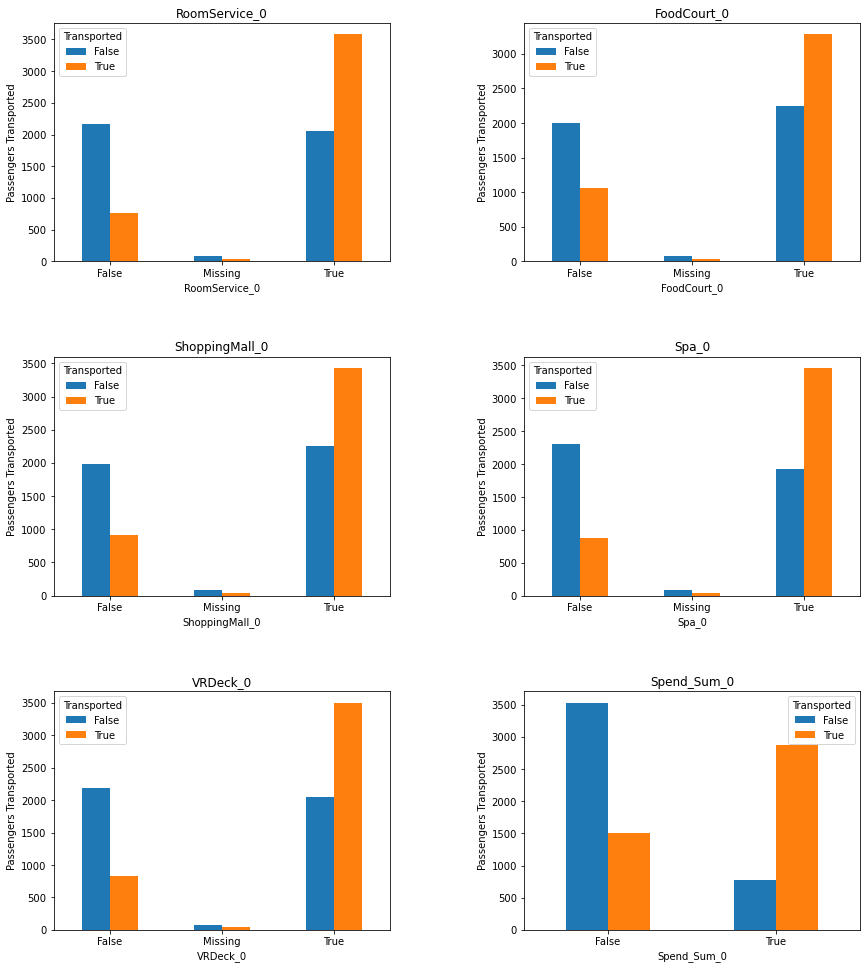

In [26]:
#Plot $0 to if they spent any amount of money at the location
features_0 = ['RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0', 'Spend_Sum_0']

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features_0):
    ax_i = plt.subplot(3, 2, i)
    money_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    money_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [27]:
#Making sure if the passenger is in suspended animation they don't spend money
df_cryo = df_train[df_train['CryoSleep']==True]
df_cryo['Spend_Sum_0'].value_counts()

True    3037
Name: Spend_Sum_0, dtype: int64

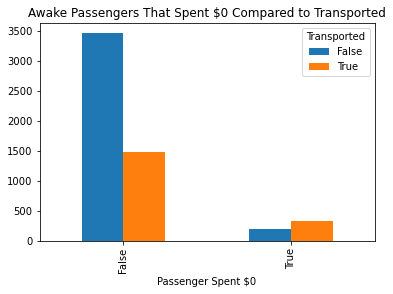

In [28]:
#Seeing how many spent $0 that were not Cryo Sleep
df_awake = df_train[df_train['CryoSleep']==False]
awake_sum = df_awake.groupby(['Spend_Sum_0','Transported']).size().unstack('Transported')
awake_sum.plot(kind='bar')
plt.title('Awake Passengers That Spent $0 Compared to Transported')
plt.xlabel('Passenger Spent $0')
plt.show()

In [29]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_Categories', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_Categories', 'FoodCourt_Categories',
       'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories',
       'RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0'],
      dtype='object')

In [30]:
#Keeping the data columns for $0 spending True or False
#Removing the category bins for all spending locations
col_remove = ['RoomService_Categories', 'FoodCourt_Categories', 
              'ShoppingMall_Categories', 'Spa_Categories', 'VRDeck_Categories']
df_train = df_train.drop(col_remove, axis=1)
df_test = df_test.drop(col_remove, axis=1)

In [31]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_Categories', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0'],
      dtype='object')

In [32]:
#convert Cabin column in to two categorical columns:
#Deck and Side (P for port or S for Starboard)
df_train.Cabin.head(10)

df_train['Cabin_Deck'] = df_train.Cabin.str.split('/').str.get(0)
df_train['Cabin_Side'] = df_train.Cabin.str.split('/').str.get(-1)
df_test['Cabin_Deck'] = df_test.Cabin.str.split('/').str.get(0)
df_test['Cabin_Side'] = df_test.Cabin.str.split('/').str.get(-1)

df_train[['Cabin_Deck','Cabin_Side']].head()

,Cabin_Deck,Cabin_Side
0,B,P
1,F,S
2,A,S
3,A,S
4,F,S


In [33]:
#Fill all N/A data with missing in remaining categorical columns
df_train.fillna('Missing', inplace=True)
df_test.fillna('Missing', inplace=True)
#df_train.head(10)
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Age_Categories    0
Spend_Sum         0
Spend_Sum_0       0
RoomService_0     0
FoodCourt_0       0
ShoppingMall_0    0
Spa_0             0
VRDeck_0          0
Cabin_Deck        0
Cabin_Side        0
dtype: int64

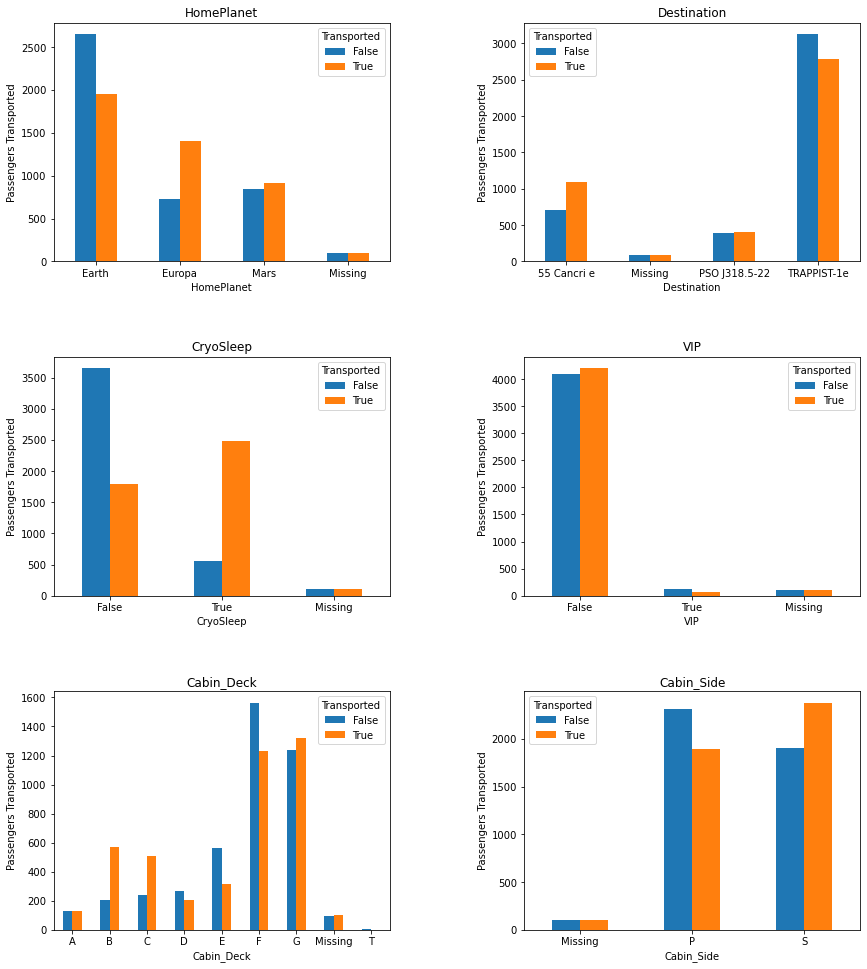

In [34]:
#Plot Remaining Categorical Data Columns
features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin_Deck', 'Cabin_Side']

#df_train.groupby('HomePlanet',as_index=False).agg({'HomePlanet': lambda x : ','.join(x.unique()), 'Transported':'sum'})
#df_train.groupby(['HomePlanet','Transported']).size().unstack('Transported').plot.bar()

fig = plt.figure(figsize=(14,18))
for i, feat in zip(range(1,7), features):
    ax_i = plt.subplot(3, 2, i)
    cat_group = df_train.groupby([feat,'Transported']).size().unstack('Transported')
    cat_group.plot(kind='bar', ax=ax_i)
    plt.setp(ax_i.get_xticklabels(), ha="center", rotation=0)
    ax_i.set_xlabel(feat)
    ax_i.set_ylabel('Passengers Transported')
    ax_i.set_title(feat)

plt.subplots_adjust(left=0.1,
                    bottom=0.5, 
                    right=0.9, 
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()

In [35]:
#compare cryo data to all other data

In [36]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_Categories', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0',
       'Cabin_Deck', 'Cabin_Side'],
      dtype='object')

In [37]:
df_train.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported           bool
Age_Categories    category
Spend_Sum          float64
Spend_Sum_0         object
RoomService_0       object
FoodCourt_0         object
ShoppingMall_0      object
Spa_0               object
VRDeck_0            object
Cabin_Deck          object
Cabin_Side          object
dtype: object

In [38]:
#Calculate percentage of True/False/Missing from each categorical column
bool_features = ['CryoSleep','VIP','RoomService_0','FoodCourt_0','ShoppingMall_0','Spa_0','VRDeck_0','Spend_Sum_0']

for feature in bool_features:
    bool_percent = df_train[feature].value_counts() / len(df_train)
    print('Percentage of Values for '+feature+' :')
    print(bool_percent)
    print('\n')


Percentage of Values for CryoSleep :
False      0.625676
True       0.349362
Missing    0.024963
Name: CryoSleep, dtype: float64


Percentage of Values for VIP :
False      0.953756
Missing    0.023352
True       0.022892
Name: VIP, dtype: float64


Percentage of Values for RoomService_0 :
True       0.649373
False      0.337628
Missing    0.012999
Name: RoomService_0, dtype: float64


Percentage of Values for FoodCourt_0 :
True       0.635684
False      0.351317
Missing    0.012999
Name: FoodCourt_0, dtype: float64


Percentage of Values for ShoppingMall_0 :
True       0.653744
False      0.333372
Missing    0.012884
Name: ShoppingMall_0, dtype: float64


Percentage of Values for Spa_0 :
True       0.619924
False      0.366502
Missing    0.013574
Name: Spa_0, dtype: float64


Percentage of Values for VRDeck_0 :
True       0.639250
False      0.346256
Missing    0.014494
Name: VRDeck_0, dtype: float64


Percentage of Values for Spend_Sum_0 :
False    0.579777
True     0.420223
Name: Sp

In [39]:
#Since the missing values for each feature is less than 1% I'm not going to remove the missing rows yet
#Instead converting True = 1, False = 0 and Missing = -1
#list of object boolean features -> bool_features
for feature in bool_features:
    #train df
    df_train[feature] = df_train[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_train[feature] = df_train[feature].replace({False: 0, True: 1, 'Missing':-1})
    #test df
    df_test[feature] = df_test[feature].replace({'False': 0, 'True': 1, 'Missing':-1})
    df_test[feature] = df_test[feature].replace({False: 0, True: 1, 'Missing':-1})
    
#Converting Transported to 1/0 values
df_train.Transported = df_train.Transported.replace({True: 1, False: 0})

df_train[['CryoSleep', 'VIP', 'RoomService_0', 'FoodCourt_0', 'ShoppingMall_0',
          'Spa_0', 'VRDeck_0','Spend_Sum_0','Transported']].head(10)

,CryoSleep,VIP,RoomService_0,FoodCourt_0,ShoppingMall_0,Spa_0,VRDeck_0,Spend_Sum_0,Transported
0,0,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,0,1,0,1,0,1,0,1
6,0,0,0,0,0,1,1,0,1
7,1,0,1,1,1,1,1,1,1
8,0,0,1,0,0,0,1,0,1
9,1,0,1,1,1,1,1,1,1


In [40]:
print(df_train['CryoSleep'].value_counts())
print('\n')
print(df_train['FoodCourt_0'].value_counts())
print('\n')
print(df_train['Spend_Sum_0'].value_counts())
#df_train.head(15)

 0    5439
 1    3037
-1     217
Name: CryoSleep, dtype: int64


 1    5526
 0    3054
-1     113
Name: FoodCourt_0, dtype: int64


0    5040
1    3653
Name: Spend_Sum_0, dtype: int64


In [41]:
#Dummy values for all categorical data
# cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 
#                 'VIP','Age_Categories', 'RoomService_Categories',
#                 'FoodCourt_Categories','ShoppingMall_Categories',
#                 'Spa_Categories','VRDeck_Categories','Cabin_Deck',
#                 'Cabin_Side']

cat_features = ['HomePlanet', 'Destination', 'Age_Categories', 'Cabin_Deck', 'Cabin_Side']
dummy_train_df = pd.get_dummies(df_train[cat_features])
df_train = pd.concat([df_train, dummy_train_df], axis=1)

dummy_test_df = pd.get_dummies(df_test[cat_features])
df_test = pd.concat([df_test, dummy_test_df], axis=1)

df_train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_Missing,Cabin_Deck_T,Cabin_Side_Missing,Cabin_Side_P,Cabin_Side_S
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,...,0,0,0,1,0,0,0,0,0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,...,0,0,0,0,0,0,0,0,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,...,0,0,0,1,0,0,0,0,0,1
5,0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,...,0,0,0,1,0,0,0,0,0,1
7,0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
8,0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,...,0,0,0,1,0,0,0,0,0,1
9,0008_01,Europa,1,B/1/P,55 Cancri e,14.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
#Clean the names of some of the columns
df_train.columns = df_train.columns.str.replace('_Categories_', '_')

In [43]:
print(df_train.shape)
print(df_test.shape)
df_train.columns

(8693, 50)
(4277, 49)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'Age_Categories', 'Spend_Sum', 'Spend_Sum_0',
       'RoomService_0', 'FoodCourt_0', 'ShoppingMall_0', 'Spa_0', 'VRDeck_0',
       'Cabin_Deck', 'Cabin_Side', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_Missing', 'Destination_55 Cancri e',
       'Destination_Missing', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Age_Missing', 'Age_Infant', 'Age_Child',
       'Age_Teenager', 'Age_Young Adult', 'Age_Adult', 'Age_Senior',
       'Cabin_Deck_A', 'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D',
       'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_Missing',
       'Cabin_Deck_T', 'Cabin_Side_Missing', 'Cabin_Side_P', 'Cabin_Side_S'],
      dtype='object')

In [44]:
#Exporting Full Data Frame
#Next File will be performing the Machine Learning
#Duplicate columns and weak features will be removed in the Machine Learning File

df_train.to_csv(data_file_path+'Analysis_Train_SpaceTitanic.csv',index=False)
df_test.to_csv(data_file_path+'Analysis_Test_SpaceTitanic.csv', index=False)